In [17]:
import os
_DF_DIR = os.path.join('..', '..', 'df_files')

import sys
sys.path.append('..')
import plotconfig

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import FuncFormatter
from scipy import stats
import pandas as pd
import numpy as np

In [19]:
dbf1 = os.path.join(_DF_DIR, 'results.parquet')
df1 = pd.read_parquet(dbf1, engine='pyarrow')

mask1 = ((df1['method_name'] != "SVR") &
        (df1['method_name'] != "MLP") &
        (df1['method_name'] != "RandomForest") &
        (df1['eeg_name'] == "EEG_Raw") & 
        (df1['test_name'] == "random"))

In [20]:
dbf2 = os.path.join(_DF_DIR, 'results_mlp.parquet')
df2 = pd.read_parquet(dbf2, engine='pyarrow')

mask2 = ((df2['eeg_name'] == "EEG_Raw") & 
        (df2['test_name'] == "random"))

In [21]:
df = pd.concat([df1[mask1], df2[mask2]], axis=0)
# df = df1[mask1]
df

,method_name,training_size,eeg_name,test_name,fit_time,raw_scores,shuffled_scores,target_raw_score,target_shuffled_score,scores,true_distances,euclidean_at_top_rank,pearsonr_statistic,pearsonr_pvalue,spearmanr_statistic,spearmanr_pvalue,target_rank
12,LinearRegression,6000,EEG_Raw,random,1907.920291,"[0.9665391282579687, 0.9475260420696522, 0.953...","[1.0350396567396247, 1.0265423477472213, 1.031...",0.919959,1.016179,"[1.0713564258959436, 1.0835926914745413, 1.081...","[22.729925318787256, 13.093911794698634, 25.53...",0.000000,-0.669911,2.405598e-09,-0.645346,1.299298e-08,1
13,LinearRegression,7000,EEG_Raw,random,2057.338686,"[0.9335199882671749, 0.9346481152554965, 0.941...","[1.0141663760174786, 1.0099397056590724, 1.020...",0.922726,1.020057,"[1.086527224996805, 1.0809276668949814, 1.0834...","[22.729925318787256, 13.093911794698634, 25.53...",4.227125,-0.759867,9.626423e-13,-0.741095,6.406610e-12,3
14,LinearRegression,9234,EEG_Raw,random,2408.525847,"[0.9386526912659529, 0.919881321325007, 0.9230...","[1.0213132679896069, 1.0079339218384646, 1.007...",0.924106,1.014864,"[1.088175287928411, 1.0958234068830817, 1.0913...","[22.729925318787256, 13.093911794698634, 25.53...",3.271021,-0.753579,1.850779e-12,-0.725313,2.792472e-11,7
15,LinearRegression,5000,EEG_Raw,random,1671.758755,"[0.9291736791583943, 0.9068224865458981, 0.941...","[1.024875430895261, 1.011832443002462, 1.02266...",0.910297,1.017314,"[1.1034674273386005, 1.1159498265301697, 1.087...","[22.729925318787256, 13.093911794698634, 25.53...",4.384787,-0.628862,3.711057e-08,-0.616227,7.964980e-08,3
16,LinearRegression,4000,EEG_Raw,random,1444.325983,"[0.9505744894990054, 0.9357526291718328, 0.935...","[1.039346855523494, 1.040973744806883, 1.03400...",0.929158,1.034108,"[1.0932962719001407, 1.1125046392821878, 1.105...","[22.729925318787256, 13.093911794698634, 25.53...",0.264815,-0.733113,1.366473e-11,-0.741206,6.338159e-12,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14531,MLP,500,EEG_Raw,random,450.368831,"[1.1182653987118836, 1.1399848871074942, 1.155...","[1.1324052448554036, 1.262803323172218, 1.1125...",1.138793,1.283289,"[1.0277078220760505, 1.111770228440335, 0.9657...","[21.11742874927802, 13.839977121571705, 20.036...",10.042942,-0.190211,7.273768e-02,-0.183607,8.012032e-02,3
14532,MLP,9000,EEG_Raw,random,8809.027244,"[1.2678188483468111, 1.2477851559067517, 1.273...","[1.4270451726969813, 1.4135063144669326, 1.370...",1.263373,1.409350,"[1.125912444801784, 1.1337354548408334, 1.0767...","[21.11742874927802, 13.839977121571705, 20.036...",0.403507,-0.324340,5.732008e-03,-0.324368,5.728223e-03,27
14533,MLP,2000,EEG_Raw,random,1553.186747,"[1.220970127636862, 1.2421691007178812, 1.1905...","[1.2478239382677203, 1.2803641081824622, 1.312...",1.182380,1.294247,"[1.0231676053775187, 1.032795715112095, 1.1053...","[21.11742874927802, 13.839977121571705, 20.036...",23.588978,0.039367,6.173920e-01,-0.007169,4.783239e-01,9
14534,MLP,3000,EEG_Raw,random,2358.809444,"[1.1946638504555422, 1.1935403015015869, 1.188...","[1.3055980425858922, 1.341142274962654, 1.2758...",1.173394,1.337774,"[1.0937117940268024, 1.1248107148359776, 1.075...","[21.11742874927802, 13.839977121571705, 20.036...",0.000000,-0.083157,2.637986e-01,-0.020561,4.380429e-01,1


['LinearRegression', 'Shuffle_LinearRegression', 'DummyScoring_Mean', 'SVR', 'MLP', 'Theoretical Random']
['Linear Regression', 'Shuffle Linear Regression', 'Mean Dummy Regressor', 'SVR', 'MLP', 'Random Retrieval']
[ 0.          6.63529412 10.         15.         20.         25.
 30.         35.         40.        ]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


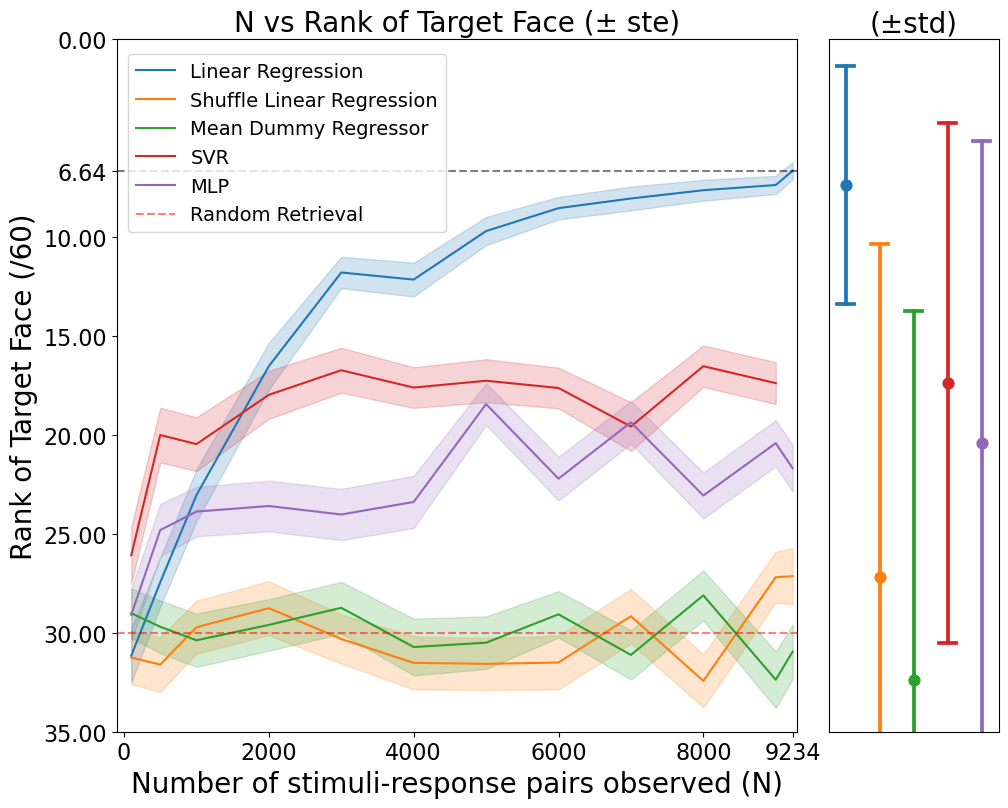

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2, 
                               figsize=(10, 8), 
                               gridspec_kw={'width_ratios': [4, 1]})

sns.lineplot(data=df, 
             x='training_size', 
             y='target_rank', 
             hue='method_name', 
             errorbar=('se', 1),
             ax=ax1)

ax1.axhline(y=plotconfig.IR_RANDOM_TARGET_RANK, color='r', linestyle='--', alpha=0.5, label='Theoretical Random')


# Clear the existing legend
ax1.get_legend().remove()
# Create a new legend with custom labels and position
handles, labels = ax1.get_legend_handles_labels()
print(labels)
# new_labels = ['Linear Regression', 'Shuffle Linear Regression', 'Dummy Regressor (Mean)', 'Theoretical Random Retrieval']  # Replace with your desired labels
new_labels = ['Linear Regression', 'Shuffle Linear Regression', 'Mean Dummy Regressor', 'SVR', 'MLP', 'Random Retrieval']  # Replace with your desired labels
print(new_labels)
ax1.legend(handles, new_labels, 
           bbox_to_anchor=(0.25, 0.85),  # x, y coordinates inside the plot
           loc='center',               # Center the legend box at the specified coordinates
           # title_fontsize=14,
           fontsize=plotconfig.LEGEND_FONTSIZE)

ax1.set_title("N vs Rank of Target Face (± ste)", fontsize=plotconfig.LABEL_FONTSIZE)
ax1.set_xlabel("Number of stimuli-response pairs observed (N)", fontsize=plotconfig.LABEL_FONTSIZE)
ax1.set_ylabel("Rank of Target Face (/60)", fontsize=plotconfig.LABEL_FONTSIZE)

current_xticks = ax1.get_xticks()
new_xticks = np.sort(np.append(current_xticks, np.max(df['training_size'])
))
ax1.set_xticks(new_xticks)

current_yticks = ax1.get_yticks()
min_value = df[df['method_name'] == 'LinearRegression'].groupby('training_size')['target_rank'].mean().min()
current_yticks = current_yticks[current_yticks != 5]
new_yticks = np.sort(np.append(current_yticks, min_value))
ax1.set_yticks(new_yticks)
print(new_yticks)
ax1.axhline(y=min_value, color='k', linestyle='--', alpha=0.5)

ax1.tick_params(axis='x', labelsize=plotconfig.TICK_SIZE)
ax1.tick_params(axis='y', labelsize=plotconfig.TICK_SIZE)

# ax1.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
# plt.gca().yaxis.set_major_formatter(FuncFormatter(custom_formatter))
# plt.gca().xaxis.set_major_locator(plt.AutoLocator())
ylim = [0, 35]
ax1.set_xlim(-100, 9300)  # Set x-axis limits from 0 to 60
ax1.set_ylim(ylim)  # Set y-axis limits from 0 to 10
ax1.invert_yaxis()


df_last = df[df['training_size'] == 9000]

sns.pointplot(x='method_name', y='target_rank', hue='method_name', data=df_last, 
              capsize=0.5, linestyle='none', errorbar='sd')

ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_title('(±std)', fontsize=plotconfig.LABEL_FONTSIZE)
ax2.tick_params(axis='x', which='both', bottom=False, labelbottom=False)  # Remove y-ticks and labels
ax2.tick_params(axis='y', which='both', left=False, labelleft=False)  # Remove y-ticks and labels

ax2.set_ylim(ylim)  # Set y-axis limits from 0 to 10
ax2.invert_yaxis()

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)


# Save as high-definition
fbasename = "target_rank"
plt.gcf().savefig(f'{fbasename}.png', format='png', dpi=300, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.eps', format='eps', dpi=1200, bbox_inches='tight')
plt.gcf().savefig(f'{fbasename}.svg', format='svg', dpi=1200, bbox_inches='tight')

In [7]:
# df = pd.concat([df1[mask1], df2[mask2]], axis=0)
df = df1[mask1]

mask = ((df['training_size'] == 9000))
df = df[mask]

([0, 1, 2, 3, 4],
 [Text(0, 0, 'DummyScoring_Mean'),
  Text(1, 0, 'Shuffle_LinearRegression'),
  Text(2, 0, 'LinearRegression'),
  Text(3, 0, 'SVR'),
  Text(4, 0, 'MLP')])

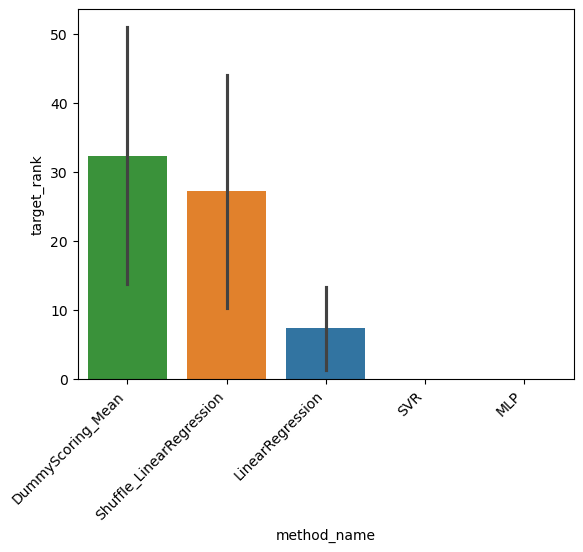

In [8]:
order = ['DummyScoring_Mean', 
         'Shuffle_LinearRegression', 
         'LinearRegression', 
         'SVR', 
         'MLP']

sns.barplot(data=df, 
            x='method_name', 
            y='target_rank', 
            hue='method_name', 
            order=order,
            errorbar='sd')

plt.xticks(rotation=45, ha='right')

# plt.gca().invert_yaxis()